# About fat objects in space

Recently, I found myself wondering whether a spaceship with no active propulsion stays aligned on its trajectory while orbiting planets. Consider the simple scenario of a satellite that happens to be placed at a certain distance to earth with a velocity that was chosen to exactly meet the criterion of a circular orbit. At a distance $r$ we find this velocity $v$ by evaluating
$$v = \sqrt{\frac{GM}{r}}$$
where $GM$ is the product of the gravitational constant and the mass of the given astronomical body (the earth in our example.) 
This is all nice, but this equation does not tell us anything about the alignment of our satellite! In fact, deriving the equation we had to assume a point-like particle (the satellite), and asking about the alignment of something that is point-like is—pun intended—pointless. To be fair, the concept of a point-like particle is well established in physics and is successfully applied to extended objects as well by assuming that all the mass is concentrated in the object's center of mass; In this framework, rotations can then be formulated in terms of moments of inertia. However, it is noteworthy to mention that this is only an approximation in most scenarios. Consider a free-falling dumbbell in space, i.e, two point-like masses (blue and orange) that are connected with a massless yet rigid bar.

<center><img src="dumbbell_in_space.png" style="width: 400px;"/></center>

The distance $r$ to the earth (big grey blob) is larger for the point masses than the distance of their center of mass (small, dashed grey blob) to the earth. Furthermore, a fraction of the gravitational force that is pulling the masses towards the center of the earth is absorbed in the rigid bar. Both of these effects only cancel if the force $F(r)$ scales linearly with the distance:
$$F(r) \cos \alpha \overset{!}{=} F(r \cos \alpha)$$
which is certainly not the case for the gravitational force $F(r) \propto r^{-2}$.

**So how does an extended object propagate in space?** Let's approximate our satellite with the dumbbell shown in the picture above. Obviously, this is a very poor approximation but at least we can now reason about orientation while still using (constrained) point-like particles in our calculations. More precisely, we want to know how the orientation of the dumbbell changes if the dumbbell has no initial internal torque and a horizontal velocity of exactly $\sqrt{GM / r}$.

Mathematically, we strive for a solution of the equations of motion given by the Hamiltonian
$$H = \frac{p_1^2}{2m_1} + \frac{p_2^2}{2m_2} + V(q_1) + V(q_2),$$
where $q_1 = |\vec q_1|$ and $q_1 = |\vec q_1|$ are the spatial coordinates, and $p_1 = |\vec p_1|$ and $p_1 = |\vec p_1|$ are the momenta for the two point-like masses, $m_1$ and $m_2$, of the dumbbell that is moving in a force field induced by the conservative potential
$$V(r) = -\frac{GM}{r} \,.$$
Both masses are constrained by
$$g(\vec q_1, \vec q_2) = \frac{1}{2} \left( \left| \vec q_1 - \vec q_2 \right|^2 - \ell^2 \right) \overset{!}{=} 0$$
where $\ell$ is the length of the rigid bar.

Although being a poorly approximation, if we find a chaotic looking behaviour (even in 2D) for a simple dumbbell, we cannot expect a *clean* behavior, such as, "the object is always aligned on its trajectory" or "keeps its intial orientation" for a complex object in reality; **spoiler: it is neither of both**.

# Finding a Numerical Solution

We use a [Strang splitting](https://doi.org/10.1137/0705041) $\phi_t = \phi_{t/2}^{[1]} \circ \phi_t^{[2]} \circ \phi_{t/2}^{[1]}$ to integrate the Hamiltonian system $H = H^{[1]} + H^{[2]}$ with
$$\begin{align*}
    H^{[1]} &= \frac{p_1^2}{2m_1} + \frac{p_2^2}{2m_2} + \lambda g(\vec q_1, \vec q_2) \\
    H^{[2]} &= V(q_1) + V(q_2) + \lambda g(\vec q_1, \vec q_2)
\end{align*}$$
where $g(\vec{q}_1, \vec{q}_2)$ constrains the solution to stay on the manifold with the tangent bundle
$$\frac{\partial g}{\partial(\vec{q}_1, \vec{q}_2)} \left(\frac{\partial H}{\partial(\vec{p}_1, \vec{p}_2)} \right)^{\!\top} = \underbrace{\left( \frac{\vec{p}_1}{m_1} - \frac{\vec{p}_2}{m_2} \right)}_{\Delta \vec{v}} \cdot \underbrace{\left( \vec{q}_1 - \vec{q}_2 \right)}_{\Delta \vec{q}} = 0 \quad \Leftrightarrow \quad \Delta \vec{v} \perp \Delta \vec{q}$$

In 2D, i.e., $\vec q = (q_x, q_y)^\top$ and $\vec p = (p_x, p_y)^\top$, the mappings $\phi^{[1]}_t$ and $\phi^{[2]}_t$ can easily be found:

The integration step $\phi^{[1]}_t$ is a rotation in phase space that keeps the total the distance $|\vec q_1 - \vec q_2|$ and the total momentum $\vec p_1 + \vec p_2$ invariant:
$$\begin{align*}
    \vec q_1 &\overset{\phi_t^{[1]}}{\longleftarrow}
    \vec v_0 \, t + \vec Q + \frac{\mu}{m_1} \begin{pmatrix} \Delta q_x \cos \omega t + \Delta q_y \sin \omega t \\ \Delta q_y \cos \omega t - \Delta q_x \sin \omega t \end{pmatrix} \\
    \vec q_2 &\overset{\phi_t^{[1]}}{\longleftarrow}
    \vec v_0 \, t + \vec Q - \frac{\mu}{m_2} \begin{pmatrix} \Delta q_x \cos \omega t + \Delta q_y \sin \omega t \\ \Delta q_y \cos \omega t - \Delta q_x \sin \omega t \end{pmatrix}
\end{align*}$$

$$\begin{align*}
    \vec p_1 &\overset{\phi_t^{[1]}}{\longleftarrow}
    m_1 \vec v_0 - \mu \omega \begin{pmatrix} -\Delta q_y \cos \omega t + \Delta q_x \sin \omega t \\ +\Delta q_x \cos \omega t + \Delta q_y \sin \omega t \end{pmatrix} \\
    \vec p_2 &\overset{\phi_t^{[1]}}{\longleftarrow}
    m_2 \vec v_0 + \mu \omega \begin{pmatrix} -\Delta q_y \cos \omega t + \Delta q_x \sin \omega t \\ +\Delta q_x \cos \omega t + \Delta q_y \sin \omega t \end{pmatrix}
\end{align*}$$
where we introduced the following abbreviations for the sake of brevity:
$$\begin{align*}
    \vec Q &= \frac{m_1 \vec q_1 + m_2 \vec q_2}{m_1 + m_2} &\quad& \text{(center of mass)}\\
    \mu &= \frac{m_1 m_2}{m_1 + m_2} &\quad& \text{(reduced mass)} \\
    \vec v_0 &= \frac{\vec p_1 + \vec p_2}{m_1 + m_2} &\quad& \text{(net velocity)}\\
    \omega &= \frac{\Delta v_x \Delta q_y - \Delta v_y \Delta q_x}{\ell^2} &\quad& \text{(torque)}
\end{align*}$$

Alternatively, with $\vec \delta_q \perp \vec \delta_p$ where
$$\begin{align*}
    \vec \delta_q &= \begin{pmatrix}
        +2 \, \Delta q_x \sin^2 \omega t/2 - \Delta q_y \sin \omega t \\
        +2 \, \Delta q_y \sin^2 \omega t/2 + \Delta q_x \sin \omega t
    \end{pmatrix} \\
    \vec \delta_p &= \begin{pmatrix}
        +2 \, \Delta q_y \sin^2 \omega t/2 + \Delta q_x \sin \omega t \\
        -2 \, \Delta q_x \sin^2 \omega t/2 + \Delta q_y \sin \omega t
    \end{pmatrix}
\end{align*}$$
we find an equivalent formulation which lends itself for an numerically efficient implemention of [compensating sums](https://doi.org/10.1137/0914050):

$$\begin{align*}
\begin{pmatrix}
    \vec q_1 \\ \vec q_2
\end{pmatrix} &\overset{\phi_t^{[1]}}{\longleftarrow} \begin{pmatrix}
    \vec q_1 + \vec v_0 \, t \\ \vec q_2 + \vec v_0 \, t
\end{pmatrix} + \mu \begin{pmatrix}
    -\vec \delta_q \, / m_1\\
    +\vec \delta_q \, / m_2
\end{pmatrix} \\
\begin{pmatrix}
    \vec p_1 \\ \vec p_2
\end{pmatrix} &\overset{\phi_t^{[1]}}{\longleftarrow} \begin{pmatrix}
    \vec p_1 \\ \vec p_2
\end{pmatrix} + \mu \omega \begin{pmatrix}
    -\vec \delta_p \\
    +\vec \delta_p
\end{pmatrix}
\end{align*}$$

Similarly, the integration step $\phi^{[2]}_t$ reads:
$$\begin{align*}
    \begin{pmatrix} \vec q_1 \\ \vec q_2 \end{pmatrix} &\overset{\phi_t^{[2]}}{\longleftarrow}
    \begin{pmatrix} \vec q_1 \\ \vec q_2 \end{pmatrix} \\
    \begin{pmatrix} \vec p_1 \\ \vec p_2 \end{pmatrix} &\overset{\phi_t^{[2]}}{\longleftarrow}
    \begin{pmatrix} \vec p_1 + \vec a_1 t \\ \vec p_2 + \vec a_2 t \end{pmatrix}
\end{align*}$$
where
$$\begin{align*}
\vec a_1 &= \vec F(q_1) - \lambda \left( \vec q_1 - \vec q_2 \right) \\
\vec a_2 &= \vec F(q_2) + \lambda \left( \vec q_1 - \vec q_2 \right) \\
\end{align*}$$
and $\vec F = -\vec \nabla V$.
Again, the Lagrange multiplier,
$$\lambda = \frac{m_2 \vec F(q_1) - m_1 \vec F(q_2)}{(m_1 + m_2) \, \ell^2} \cdot \left( \vec q_1 - \vec q_2 \right)$$
ensures $\Delta \vec v \perp \Delta \vec q$.

The [Strang splitting](https://doi.org/10.1137/0705041) $\phi_t = \phi_{t/2}^{[1]} \circ \phi_t^{[2]} \circ \phi_{t/2}^{[1]}$ is a second-order symmetric and symplectic integration sheme. In our implementation we offer a set of several symmetric composition schemes, each raising the integration order by evaluating $\phi_t$ in multiple stages and refer to them as `pXsY` where `X` and `Y` are the new integration order and the number of stages, respectively:

 - `p2s1`: Vanilla Strang splitting.
 - `p4s3`: [Triple Jump](https://doi.org/10.1103/PhysRevLett.63.9)
 - `p4s5`: [Suzuki's Fractal](https://doi.org/10.1016/0375-9601(90)90962-N)
 - `p6s9`: [Kahan & Li (1997)](https://doi.org/10.1090/S0025-5718-97-00873-9)
 - `p8s15`: [Suzuki & Umeno (1993)](https://doi.org/10.1007/978-3-642-78448-4_7)

Since the Strang splitting is symplectic, its compositions are symplectic as well.

# Implementation

We use the Python programming language and accelerate it with [Numba](https://numba.pydata.org/). Find all of our requirements listed in [requirements.txt](requirements.txt)

In [1]:
!cat requirements.txt

numpy
numba
scipy
matplotlib
nbfigtulz
tqdm
imageio
jupyterlab
ipywidgets


Simply uncomment the lines below to automatically install all requirements...

In [2]:
# !pip install --upgrade pip > /dev/null
# !pip install -r requirements.txt > /dev/null && echo "success"

We are now ready to import our dependencies...

In [3]:
from pathlib import Path
import tempfile

import numpy as np

import matplotlib.pyplot as plt
import nbfigtulz as ftl

import imageio
from tqdm import tqdm

... as well as our helper scripts:

In [4]:
from integrator import integration_loop
import composition
import plotting

Next, we change the default image directory of [nbfigtulz](https://nbfigtulz.readthedocs.io/en/latest/) to a temporary place (feel free to change this!)

In [5]:
img_dir = tempfile.TemporaryDirectory()
ftl.config['img_dir'] = img_dir.name

and are now ready to implement our simulation routine:

In [6]:
def simulate(*, q, p, m, n=100, h=1e-4):
    qs = [q,]
    ps = [p,]

    for _ in tqdm(range(n), desc=f'Simulating {n=}, {h=}'):
        q, p = integration_loop(q=q, p=p, m=m, h=h, n=int(1 / h / 10), gamma=composition.gamma_p8s15)
        
        qs.append(q)
        ps.append(p)

    return np.array(qs), np.array(ps)

We like it fancy and want to see some of [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) widgets:

In [7]:
import ipywidgets as widgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


**! You might need to refresh the page to activate the widgets extension !**

In [8]:
q = None
p = None
m = None


def show_init(length, orientation, py0, torque0, m_asym):
    fig, ax = plt.subplots()
    
    ax.set_aspect("equal")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.plot(0.0, 0.0, "x", c="black")
    
    r = .5 * length
    orientation = np.deg2rad(orientation)
    
    ax.set_xlim(-.2, 1.6)
    ax.set_ylim(-.6, .6)
    
    q1 = np.array([1. + r * np.cos(orientation), r * np.sin(orientation)])
    q2 = np.array([1. - r * np.cos(orientation), -r * np.sin(orientation)])
    
    global q
    q = np.array([q1, q2])
    
    m1 = 1.
    m2 = (1. + m_asym) / (1. - m_asym) * m1
    
    global m
    m = np.array([m1, m2])
    
    p1 = np.array([torque0, py0])
    p2 = np.array([-torque0, py0])
    
    global p
    p = np.array([p1, p2])

    ax.plot([q1[0], q2[0]], [q1[1], q2[1]], "k-", alpha=0.5)
    ax.plot(q1[0], q1[1], "o", markersize=m1 * 10, color="C0")
    ax.plot(q2[0], q2[1], "o", markersize=m2 * 10, color="C1")

In [9]:
length = widgets.FloatSlider(value=.35, min=0.01, max=1., step=.01, description='Length')
orientation = widgets.FloatSlider(value=0., min=0., max=90., step=.1, description='Orientation')
py0 = widgets.FloatSlider(value=1., min=-1.5, max=2., step=.01, description='Momentum')
torque0 = widgets.FloatSlider(value=0., min=-1., max=1., step=.01, description='Torque')
m_asym = widgets.FloatSlider(value=0., min=0., max=.8, step=.01, description='Mass asymmetry')

out = widgets.interactive_output(show_init, {
    'length': length,
    'orientation': orientation,
    'py0': py0,
    'torque0': torque0,
    'm_asym': m_asym,
})

widgets.HBox([widgets.VBox([length, orientation, py0, torque0, m_asym]), out])

Let's check the initial conditions, or replace them with others, e.g.,

In [10]:
#q = np.array([[1., .5], [1., -.5]])
#p = np.array([[0., 1.2], [0., 1.2]])
#m = np.array([1., 1.])

print(f'{q=}')
print(f'{p=}')
print(f'{m=}')

q=array([[ 1.175,  0.   ],
       [ 0.825, -0.   ]])
p=array([[ 0.,  1.],
       [-0.,  1.]])
m=array([1., 1.])


We chose $GM=1$ which conveniently makes the velocity at $r=1$ for a circular orbit
$$v = 1$$

**Time for to actual run the simulation!** This might take a while. Feel free to reduce `h` to `1e-3` if you don't have the time...

In [11]:
# %time q, p = simulate(q=q, p=p, m=m, n=1000, h=1e-3)
%time q, p = simulate(q=q, p=p, m=m, n=1000)

Simulating n=1000, h=0.0001: 100%|████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.48it/s]

CPU times: user 30.9 s, sys: 635 ms, total: 31.6 s
Wall time: 30.8 s


Our constrained Hamiltonian (should) still conservers the total energy $H$ and angular momentum $\vec L$ because $g(\vec q_1, \vec q_2)$ is zero! Let's check:

In [12]:
plotting.plot_error(q=q, p=p, m=m)

error.png

In [13]:
def make_gif(q, m, *, n, file_name):
    fig, ax = plt.subplots()
    
    path = Path(ftl.config['img_dir'])
    frames = []
    for k in tqdm(n, 'Rendering frame'):
        ax = plotting.render_trj_frame(ax, q=q, m=m, n=k)
        
        frame = f'{k}.png'
        fig.savefig(path / frame, bbox_inches='tight')
        frames.append(frame)
        
    # plt.close()

    with imageio.get_writer(file_name, mode='I') as writer:
        for f in frames:
            img = imageio.imread(path / f)
            writer.append_data(img)

Rendering frame: 100%|██████████████████████████████████████████████████████████████████████████| 500/500 [00:22<00:00, 22.59it/s]


10M	trj.gif
10M	total


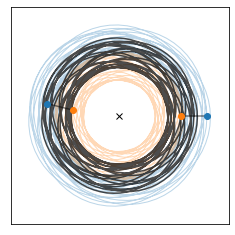

In [14]:
make_gif(q, m, n=range(1, q.shape[0], 2), file_name='trj.gif')
!du -sch trj.gif

Uncomment the line below to display the GIF. Note that this will significantly increase the size of the notebook!

In [15]:
from IPython.display import display, Image
# display(Image(data=open('trj.gif', 'rb').read(), format='png'))

# Analysis of Rotation Frequency

In [98]:
length = 1e-6
q = np.array([[1., length / 2.], [1., -length / 2.]])
p = np.array([[0., 1.], [0., 1.]])
m = np.array([1., 1.])

%time q, p = simulate(q=q, p=p, m=m, n=10000)

Simulating n=10000, h=0.0001: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:18<00:00, 38.63it/s]

CPU times: user 4min 19s, sys: 306 ms, total: 4min 19s
Wall time: 4min 18s


In [104]:
@ftl.with_context
def make_fig(*, q, m):
    q1, q2 = q[:, 0], q[:, 1]
    m1, m2 = m
    
    Q = (m1 * q1 + m2 * q2) / (m1 + m2)
    
    Qx = Q[:, 0]
    Qx /= np.max(np.abs(Qx))
    
    q1x = (q1 - Q)[:, 0]
    q1x /= np.max(np.abs(q1x))
    
    fq1x = np.abs(np.fft.rfft(q1x))
    fQx = np.abs(np.fft.rfft(Qx))
    
    freq_scale = 1. / (2. * np.pi * np.argmax(fQx))
    fq1x_max = np.argmax(fq1x) * freq_scale
    print(f'Max: {fq1x_max:.4f} Hz ({fq1x_max * 2. * np.pi:.2f})')
    
    freq = np.arange(len(fQx)) * freq_scale
        
    fig, ax = plt.subplots()
    ax.plot(freq, fQx, label='$Q_x$')
    ax.plot(freq, fq1x, label=r'$(\vec{q}_1 - \vec{Q})_x$')
    
    ax.set_xlim(0., 2.)
    ax.set_yscale('log')
    
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude (au)')
    
    ax.legend()
    
    ax.grid()
    
    return ftl.save_fig(fig, 'freq')

    
make_fig(q=q, m=m)

Max: 0.0731 Hz (0.46)


freq.png